# Import des outils / jeu de données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

import os

In [2]:
os.getcwd()

'/home/ab2/Documents/GitHub/ab2/analyse-survie/src'

In [3]:
np.random.seed(0)
sns.set_theme()

In [4]:
df = pd.read_csv(
    "../data/kickst" "arter_1.csv",
    parse_dates=True,
)

# Kaplan-Meier

<Axes: xlabel='day_succ', ylabel='Count'>

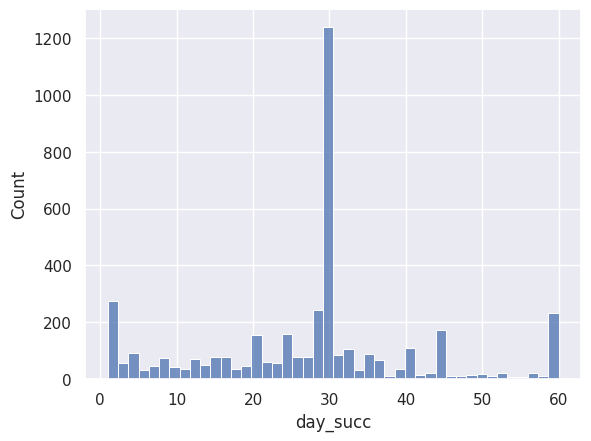

In [5]:
sns.histplot(df["day_succ"])

In [6]:
kmf1 = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf1.fit(event_times, event_observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4175 total observations, 2213 right-censored observations>

Text(0, 0.5, 'Probabilité')

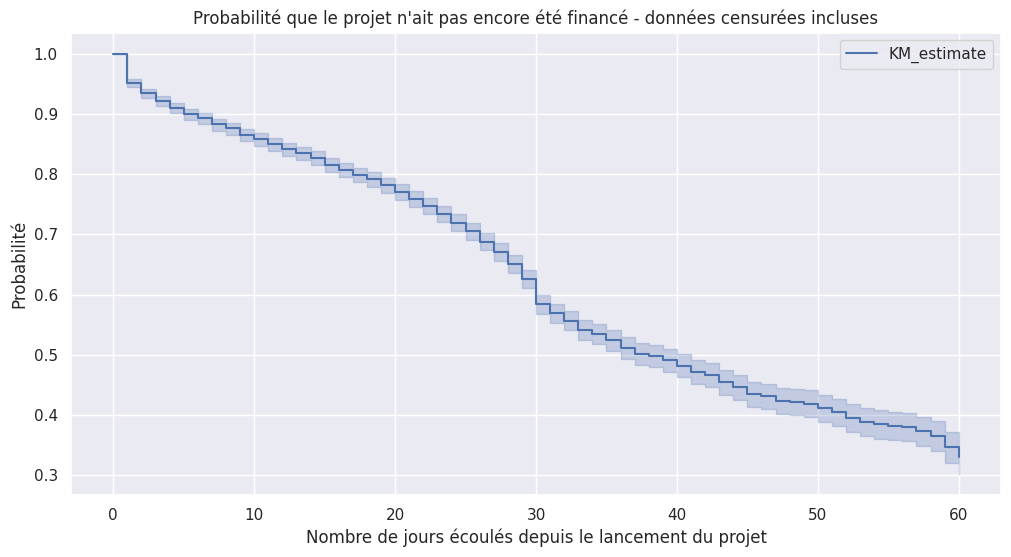

In [7]:
plt.figure(figsize=(12, 6))
kmf1.plot()
plt.title(
    "Probabilité que le projet n'ait pas encore été financé - données censurées incluses"
)
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

In [9]:
kmf2 = KaplanMeierFitter()

event_times = df["day_succ"][df["Status"] == 1]
event_observed = df["Status"][df["Status"] == 1]

kmf2.fit(event_times, event_observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1962 total observations, 0 right-censored observations>

Text(0, 0.5, 'Probabilité')

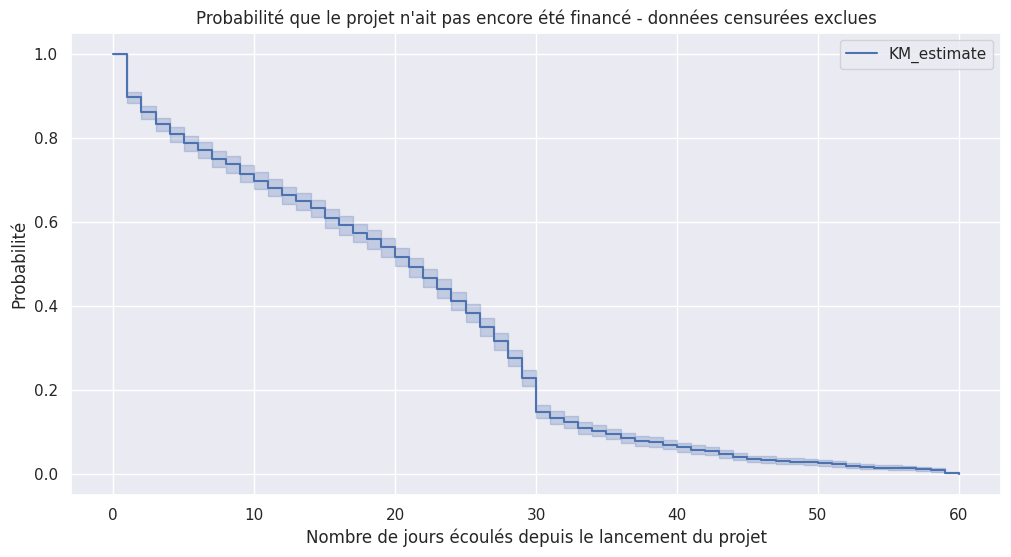

In [10]:
plt.figure(figsize=(12, 6))
kmf2.plot()
plt.title(
    "Probabilité que le projet n'ait pas encore été financé - données censurées exclues"
)
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

Text(0, 0.5, 'Probabilité')

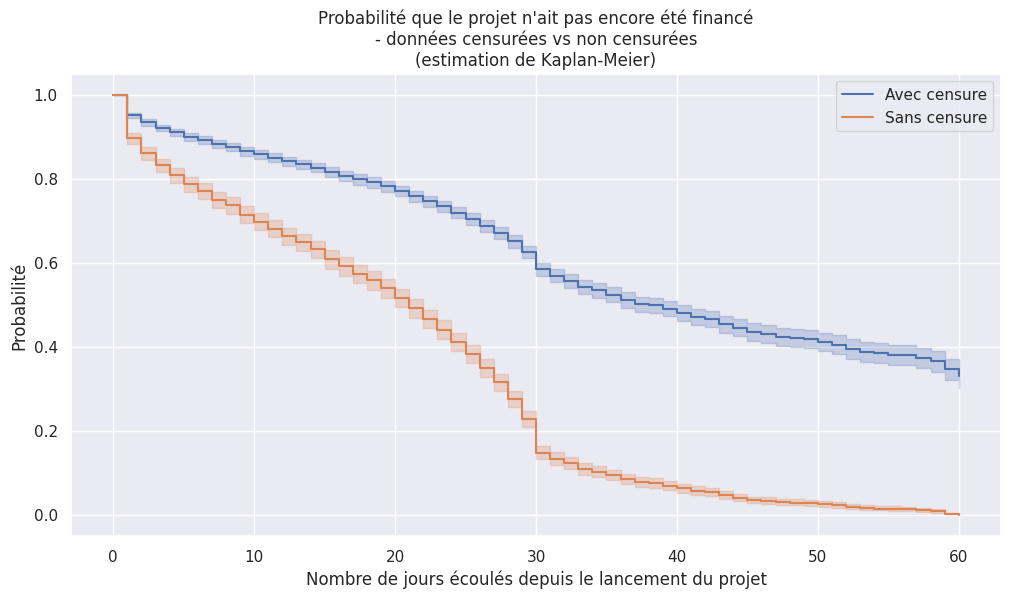

In [21]:
kmf1 = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf1.fit(event_times, event_observed)
plt.figure(figsize=(12, 6))
kmf1.plot_survival_function(label="Avec censure")
kmf2 = KaplanMeierFitter()

event_times = df["day_succ"][df["Status"] == 1]
event_observed = df["Status"][df["Status"] == 1]

kmf2.fit(event_times, event_observed)

kmf2.plot_survival_function(label="Sans censure")
plt.title(
    "Probabilité que le projet n'ait pas encore été financé\n- données censurées vs non censurées\n(estimation de Kaplan-Meier)"
)
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

# Kaplan Meier par classe

In [23]:
df_video = df[df["has_video"] == 1].copy()
df_no_video = df[df["has_video"] == 0].copy()

Text(0, 0.5, 'Probabilité')

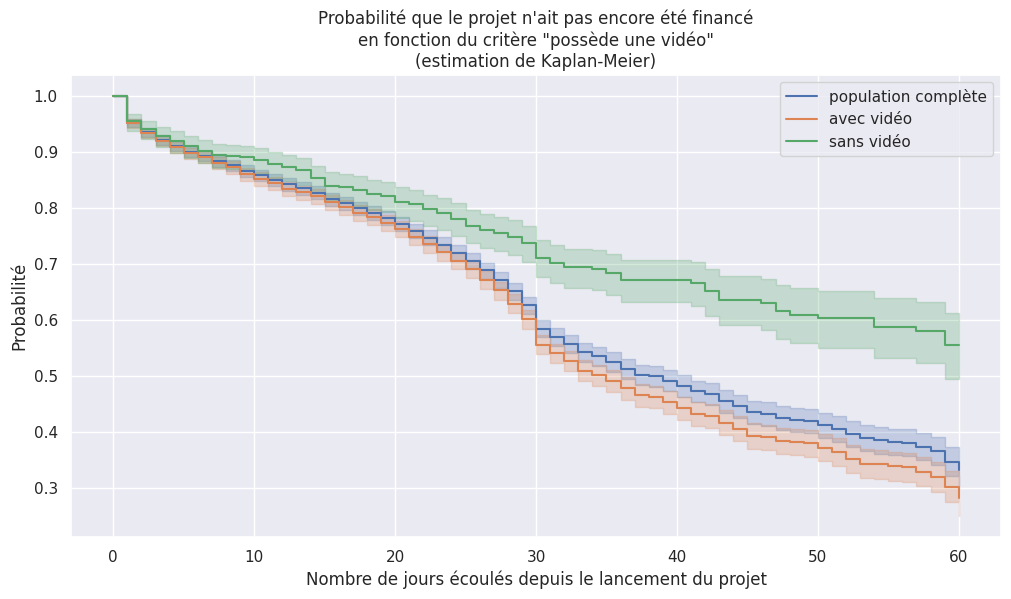

In [24]:
plt.figure(figsize=(12, 6))
kmf = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf.fit(event_times, event_observed)
kmf.plot_survival_function(label="population complète")


event_times = df_video["day_succ"]
event_observed = df_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="avec vidéo")


event_times = df_no_video["day_succ"]
event_observed = df_no_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="sans vidéo")

plt.title(
    """Probabilité que le projet n'ait pas encore été financé\nen fonction du critère "possède une vidéo"\n(estimation de Kaplan-Meier)"""
)


plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

# Estimateur de Nelson Aalen

La fonction de risque cumulé peut être estimée par l'estimateur de Nelson Aalen.  
Ce dernier fonctionne y-compris en cas de données censurées.

Pour rappel, la fonction de risque cumulée est définie par :
$$
H : \begin{cases}
\mathbb{R}^+_* & \rightarrow \mathbb{R}^+ \\
t & \rightarrow \displaystyle \int_{0}^{t} h(x)dx = -\ln(S(t)) 
\end{cases}
$$

L'estimateur de Neslon Aalen, pour tout $t \in \mathbb{R}+$, vaut
$$ 
\tilde{H}(t)=\sum_{t_i\leq t}\frac{d_i}{n_i}
$$

In [16]:
from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter()

naf.fit(event_times, event_observed=event_observed)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1962 total observations, 0 right-censored observations>

<Axes: title={'center': 'Estimation de Nelson-Aalen'}, xlabel='timeline'>

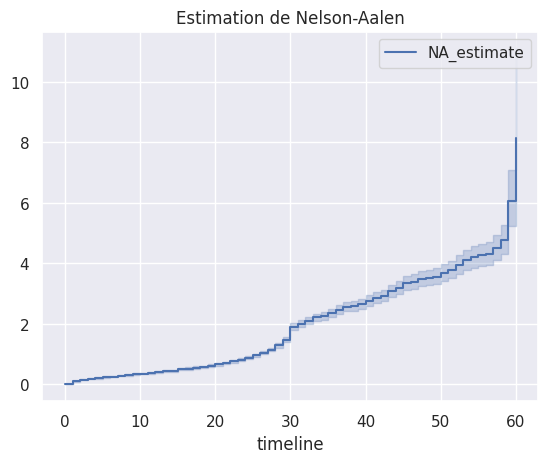

In [19]:
plt.title("Estimation de Nelson-Aalen")
naf.plot_cumulative_hazard()

# Estimateur de Breslow-Fleming-Harrington

In [25]:
from lifelines import BreslowFlemingHarringtonFitter

bfh = BreslowFlemingHarringtonFitter()

bfh.fit(event_times, event_observed=event_observed)

<lifelines.BreslowFlemingHarringtonFitter:"BFH_estimate", fitted with 796 total observations, 547 right-censored observations>

<Axes: title={'center': 'Estimateur de Breslow-Fleming-Harrington'}, xlabel='timeline'>

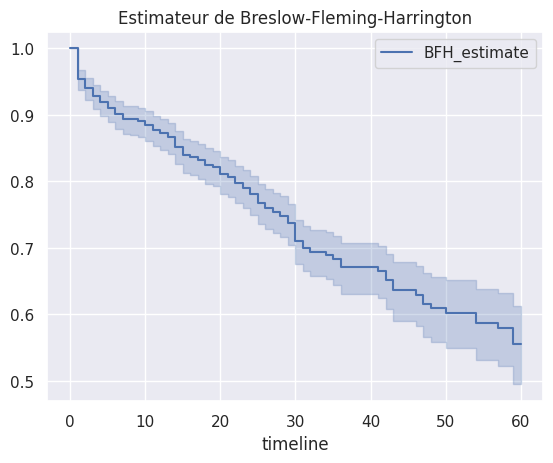

In [26]:
plt.title("Estimateur de Breslow-Fleming-Harrington")
bfh.plot()

# Expérimentations

<Axes: xlabel='timeline'>

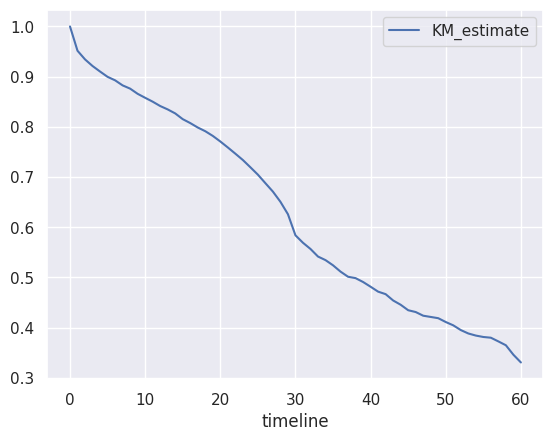

In [15]:
kmf1.survival_function_.plot()

In [58]:
df["day_succ"][df["Status"] == 0]

336      4
420      6
435      6
446      6
454      7
        ..
4170    60
4171    60
4172    60
4173    60
4174    60
Name: day_succ, Length: 2213, dtype: int64

<Axes: >

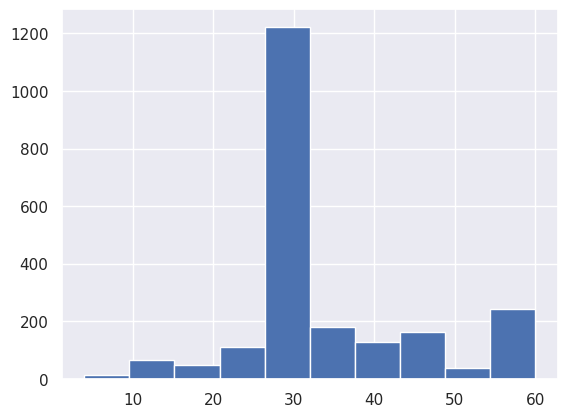

In [57]:
df["day_succ"][df["Status"] == 0].hist()

In [ ]:
df["day_succ"][df["Status"] == 1]

In [61]:
len(df.columns)

56

<Axes: >

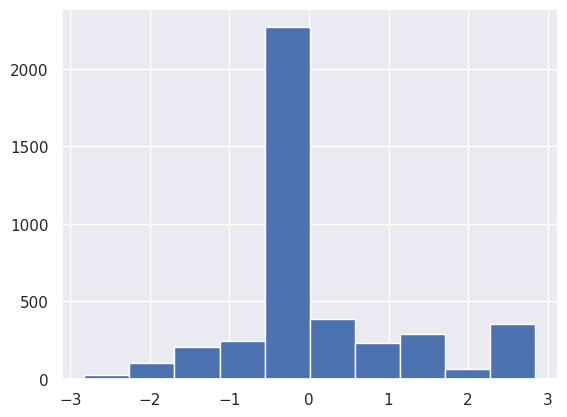

In [60]:
df["duration"].hist()